In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [29]:
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})



In [30]:
print("Missing values:", df.isna().sum().sum())
print("Duplicates:", df.duplicated().sum().sum())

Missing values: 0
Duplicates: 0


In [31]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

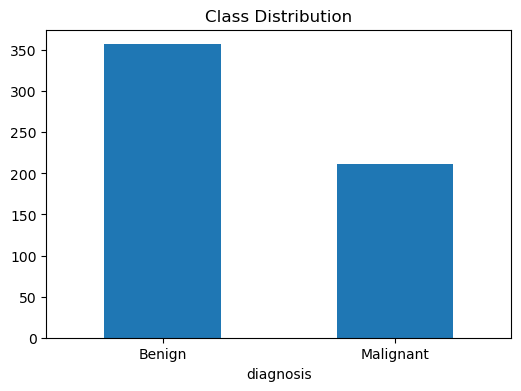

In [32]:
plt.figure(figsize=(6,4))
df['diagnosis'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xticks([0, 1], ['Benign', 'Malignant'], rotation=0)
plt.show()

SVM with linear kernel - Accuracy: 0.9649
SVM with poly kernel - Accuracy: 0.8830
SVM with rbf kernel - Accuracy: 0.9649


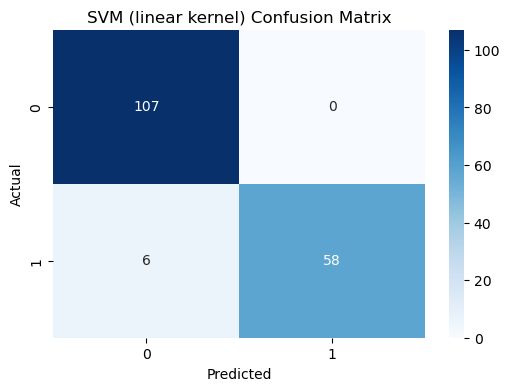

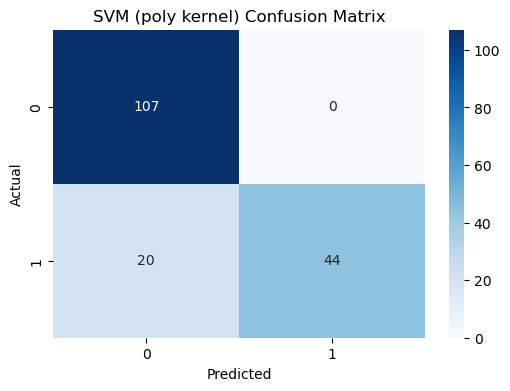

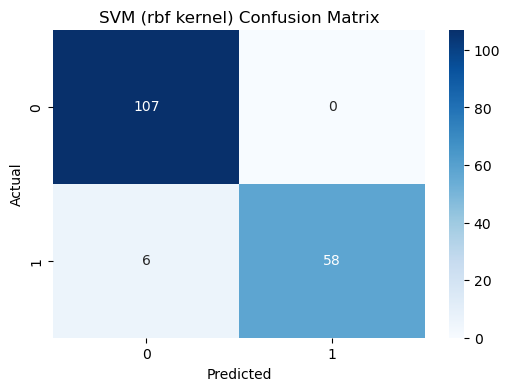


--- SVM (linear kernel) ---

Classification Report:
Accuracy: 0.9649
Precision (class 1): 1.0000
Recall (class 1): 0.9062
F1-score (class 1): 0.9508

--- SVM (poly kernel) ---

Classification Report:
Accuracy: 0.8830
Precision (class 1): 1.0000
Recall (class 1): 0.6875
F1-score (class 1): 0.8148

--- SVM (rbf kernel) ---

Classification Report:
Accuracy: 0.9649
Precision (class 1): 1.0000
Recall (class 1): 0.9062
F1-score (class 1): 0.9508


In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_results = {}
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    model = SVC(kernel=kernel, probability=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    svm_results[kernel] = {
        'model': model,
        'accuracy': acc,
        'confusion_matrix': cm,
        'report': report
    }

for k in kernels:
    print(f"SVM with {k} kernel - Accuracy: {svm_results[k]['accuracy']:.4f}")
for kernel in kernels:
    plt.figure(figsize=(6, 4))
    sns.heatmap(svm_results[kernel]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'SVM ({kernel} kernel) Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
for kernel in kernels:
    print(f"\n--- SVM ({kernel} kernel) ---")
    print("\nClassification Report:")
    report = svm_results[kernel]['report']
    print(f"Accuracy: {svm_results[kernel]['accuracy']:.4f}")
    print(f"Precision (class 1): {report['1']['precision']:.4f}")
    print(f"Recall (class 1): {report['1']['recall']:.4f}")
    print(f"F1-score (class 1): {report['1']['f1-score']:.4f}")


In [38]:
!pip install tensorflow


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

nn_model = Sequential([
    Dense(16, input_dim=X.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on test set
nn_eval = nn_model.evaluate(X_test, y_test, verbose=0)
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix and Classification Report
cm_nn = confusion_matrix(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn)

print("Neural Network Accuracy:", nn_eval[1])
print("Confusion Matrix:\n", cm_nn)


ImportError: Traceback (most recent call last):
  File "c:\Users\pc\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

NameError: name 'nn_model' is not defined

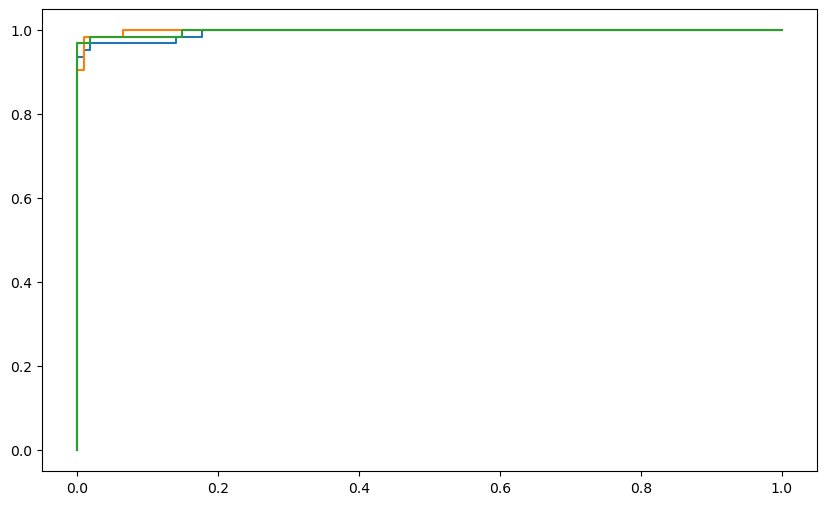

In [42]:
from sklearn.metrics import roc_curve, auc

# Plot ROC for SVMs
plt.figure(figsize=(10, 6))

for kernel in kernels:
    model = svm_results[kernel]['model']
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'SVM-{kernel} (AUC = {roc_auc:.2f})')

# Plot ROC for Neural Network
y_proba_nn = nn_model.predict(X_test).ravel()
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Net (AUC = {roc_auc_nn:.2f})', linestyle='--')

# Final plot setup
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
